<a href="https://colab.research.google.com/github/1nisharg/heart_failure_prediction/blob/main/neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TENSORFLOW

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
# Create tensors with tf.constant
scalar = tf.constant(7)
scalar

In [ ]:
#Check the number of dimensions of a tensor (ndim is no. of dimensions)

scalar.ndim

In [ ]:
#Create a vector
vector = tf.constant([10, 10])
vector

In [ ]:
#dimensions of vector
vector.ndim

In [ ]:
#Create a matrix
matrix = tf.constant([[7,10],
                     [10,7]]) 
matrix

In [ ]:
#dimension of matrix
matrix.ndim

In [ ]:
# Create another matrix
another_matrix = tf.constant([[10.0,7.0],
                              [3.,2.],
                              [6.,8.]], dtype=tf.float16)
another_matrix

In [ ]:
#ndim of another_matrix
another_matrix.ndim

In [ ]:
#Creating a tensor
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

In [ ]:
#ndim of tensor
tensor.ndim

#Creating a tensor with tf.variable()



In [ ]:
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([4,8])
changeable_tensor, unchangeable_tensor

In [ ]:
#changing one element in changeable tensor with .assign()
changeable_tensor[0].assign(4)
changeable_tensor

In [ ]:
#Creating a random tensors
import tensorflow as tf
random_1 = tf.random.Generator.from_seed(42) #set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))

random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [ ]:
#other ways of creating tensors:-

import tensorflow as tf
tf.ones([10,7])

tf.zeros(shape=(3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [ ]:
#turning numpy array into tensors

import numpy as np
numpy_A=np.arange(1, 25, dtype=np.int32)
numpy_A

A = tf.constant(numpy_A)
A


In [ ]:
#ONE HOT ENCODING

#creating a list of indices
some_list = [0,1,2,3]  #could be red, green, blue, purple

#one hot encode our list of indices
tf.one_hot(some_list, depth=5)

#NEURAL NETWORK REGRESSION



Anatomy of Neural Networks

input layer ( data goes in here) #unit/neuron=2


hidden layer ( learns patterns in data ) #unit/neuron = 3


output layer ( outputs learned representation or prediction probabilities )#unit/neuron = 1

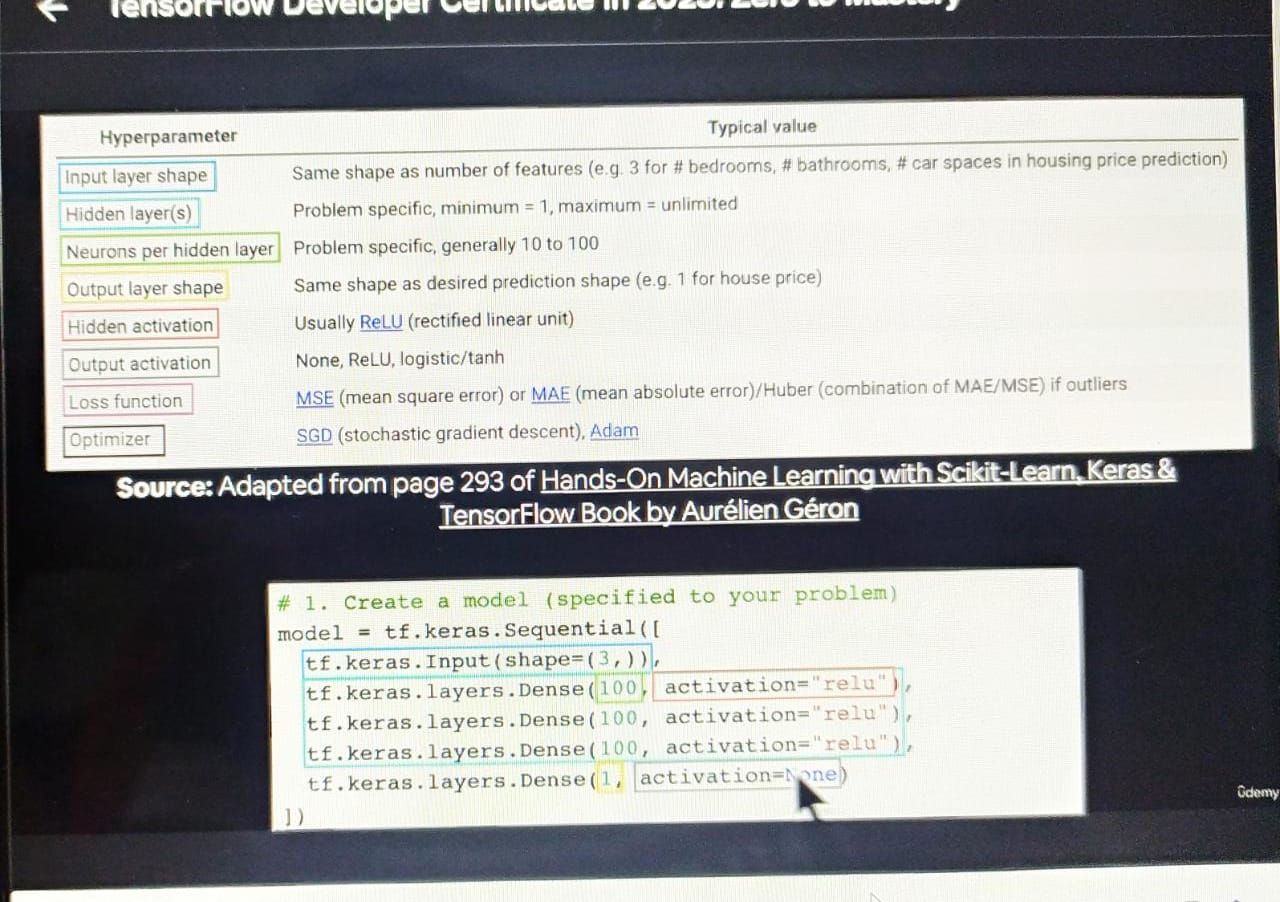

Creating simple regression data:-

In [ ]:
#introduction to regression with NN in tensorflow

#regression is predicting a numerical variable based on some other combination 
#of variable based on some other combination of variables.

import tensorflow as tf
#creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0,12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X, y)

In [ ]:
X + 10

y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

input and output shapes:-

In [ ]:
#creating a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
#Turn our NumPy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)
X, y 

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

##steps in modelling with tensorflow

1. Creating a model - define the input and output layers, a well as the hidden layers of a deep learning model.
2. Compiling a model- define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model- letting the model try to find patterns between X and y(features and labels).

In [ ]:
#Steps in modelling with tensorflow

#Set random seed
tf.random.set_seed(42)

#1 Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) #bcz we r taking 1 input and want output of 1 number.
])

#2 compile the model
model.compile(loss=tf.keras.losses.mae, #mae is mean absoulte error
              optimizer=tf.keras.optimizers.SGD(),#sgd is stochasitc gradient descent
              metrics=["mae"])

#3 Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5) #or model.fit(X, y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 551ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
#check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#try and make a prediction using our model
y_pred = model.predict([17.0]) 
y_pred

1/1 [==============================] - 0s 84ms/step


array([[12.716021]], dtype=float32)

In [ ]:
y_pred +11

array([[23.71602]], dtype=float32)

1. Construct or import a pretrained model relevant to your problem.

2. Compile the model(prepare it to be used with data).

- LOSS - how wrong your model's predictions are compared to the truth labels(you want to minimise this).
- Optimizer - how your model should update its internal patterns to better its predictions
- Metrics - human interpretable values for how well your model is doing.

3. Fit the model to the training data so it can discover patterns.
- Epochs - how many times the model will go through all of the training examples.
4. Evaluate the model on the test data.




We can improve our model, by altering the steps we took to create a model.

1. **Creating a model**- here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model**- here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model**- here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10


Epoch 1/100
1/1 [==============================] - 0s 292ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
X,y 

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#lets see if our model's prediction has improved..
model.predict([17.0])

1/1 [==============================] - 0s 52ms/step


array([[30.158512]], dtype=float32)

In [ ]:
#improving more..

#1 create the model (this time with extra hidden layer with 100 hidden units)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2 Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD())

#3 Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2859
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6279
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.9702
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3044
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6244
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.9248
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.1949
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4303
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.6245
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 6.7723
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 5.8960
Epoch 13/100
1/1 [==============================] - 0

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#now putting X = 17, llets see what will be the value of  y
model.predict([17.0])


#so previous model which showed Y=30 is better than this model....


1/1 [==============================] - 0s 58ms/step


array([[31.941305]], dtype=float32)

##common ways to improve a model:-
- Adding layers
- Increase the number of hidden units
- Change the activation function
- Change the optimizationfunc (optimizer=tf.keras.optimizer.Adam(lr=0.0001) , where lr is learning rate
- Change the learning rate 
- Fitting the more data
- Fitting for longer (epochs)


##Evaluating a model

the workflow will be as follows-

Build a model --> Fit it --> Evaluate it --> tweak a model --> fit it --> evaluate it --> tweak a model --> fit it --> Evaluate it...


In [ ]:
#make a bigger dataset
X = tf.range(-100, 100, 4)
X

y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

###The 3 sets-

- **Training set** - thhe model learns from this data, which is typically 70-80% of the total data you have available.
- **Validation set** - the model get tuned on this data, which is typically 10-15% of data available.
- **Tets set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.



**Generalization** - The ability for a machine learning model to perform well on data it hasn't seen before.

In [ ]:
### the 3 sets....
len(X)

50

In [ ]:
#split the data into train and test sets

X_train = X[:40] #first 40 are trainign samples(80% of the data)
y_train = y[:40]
X_test = X[40:] #last 10 are testing samples(20% of the data)
y_test = y[40:]

len(X_train), len(y_train), len(y_test), len(X_test)

(40, 40, 10, 10)

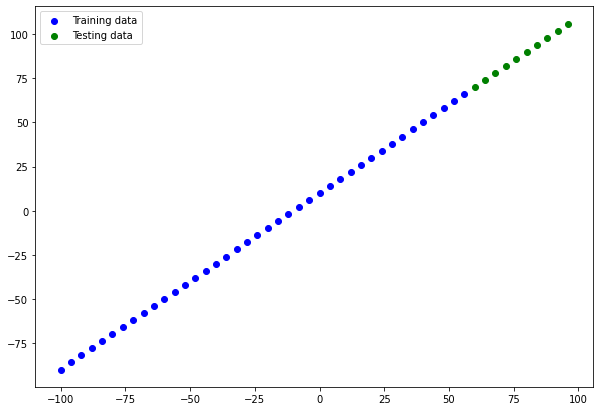

In [ ]:
### visualizing the data
#we got our training and testing data.. lets visualize it..

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data") #b=blue
plt.scatter(X_test, y_test, c="g", label="Testing data") #g=green
plt.legend();

In [ ]:
#HOW TO BUILD NEURAL NETWORK FOR OUR DATA

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(X_train, y_train, epochs=100)

#lets create a model which builds automatically by deifining input_shape argument

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Total params= total number of parameters in the model.

Trainable parameters= these are parameters(patterns) the model can update as it trains.

Non-trainable params= these parameters aren't updated during training(this is typical when you bring in already learn pattern or parameters from other models during **transfer learning**).





In [ ]:
#lets fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)


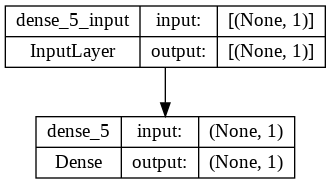

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions


to visualize predictions, it's good idea to plot them against the ground truth table.


Often you'll see this in the form of y_test or y_true VERSUS y_pred (ground truth versus our model's predictions).


In [ ]:
#making some predictions

y_pred = model.predict(X_test)
y_pred 

1/1 [==============================] - 0s 42ms/step


array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

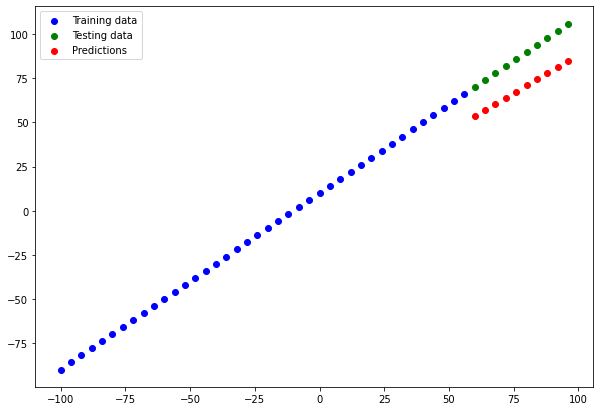

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();
     
   

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

###evaluating our model's predictions with regression evaluation metircs



Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

Mean absolute error (MAE) - the mean difference between each of the predictions.

Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more significant than smaller errors).

Huber- combination of MSE and MAE. tf.keras.losses.Huber()

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 127ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [ ]:
#calculate MAE
tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=tf.squeeze(y_pred))

#calculate MSE
tf.keras.losses.MSE(y_true=y_test,
                    y_pred=tf.squeeze(y_pred))

#making functions for our evaluation metrics:-
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        tf.squeeze(y_pred))
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       tf.squeeze(y_pred))
  
  # --> tf.squeeze will convert array into tensors.

###Running experiments to improve our models

1. Get more data- get more examples for your model to train on (more opportunities to learn patterns or relationships btw features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer- give your model more of a chance to find patterns in the data.



To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.

model_2 - 2 layers, trained for 100 epochs.

model_3 - 2 layers, trained for 500 epochs.

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 45ms/step


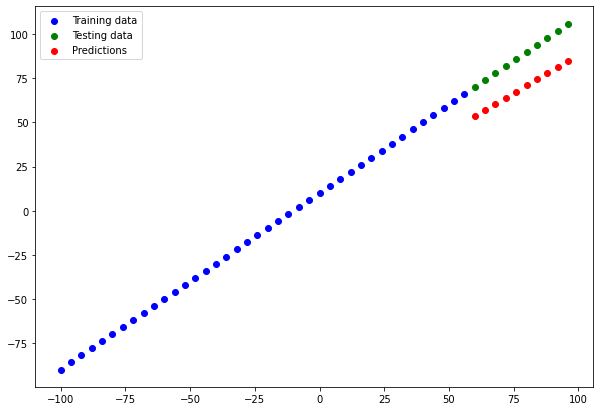

In [ ]:
#MODEL_1

tf.random.set_seed(42)

#1 Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3 fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

#make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_1))
mse_1 = tf.keras.losses.MSE(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 54ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

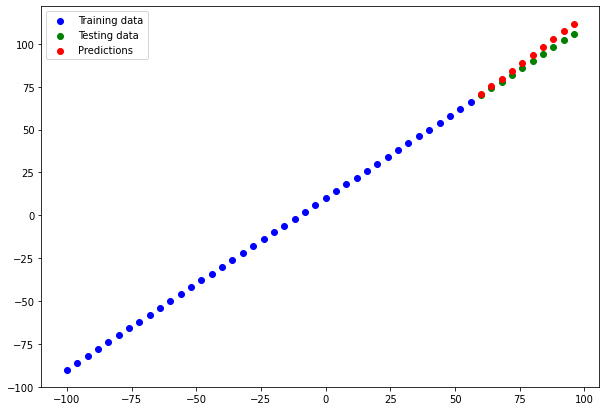

In [ ]:
#MODEL_2

tf.random.set_seed(42)

#1 Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#3 fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

#make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

#Calculate model_2 evaluation metrics
mae_2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_2))
mse_2 = tf.keras.losses.MSE(y_test, tf.squeeze(y_preds_2))
mae_2, mse_2

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 42.5822 - mse: 2823.1755
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 10.9331 - mse: 167.2227
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 26.9259 - mse: 1062.6483
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 13.6703 - mse: 247.0116
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 15.1926 - mse: 292.5403
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 12.0801 - mse: 177.9818
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.4040 - mse: 158.0894
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1956 - mse: 171.4060
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 41.6513 - mse: 2760.7686
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 28.8935 - mse: 1179.5693
Epoch 11/500
2/2 [===========================

(<tf.Tensor: shape=(), dtype=float32, numpy=68.149315>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4729.35>)

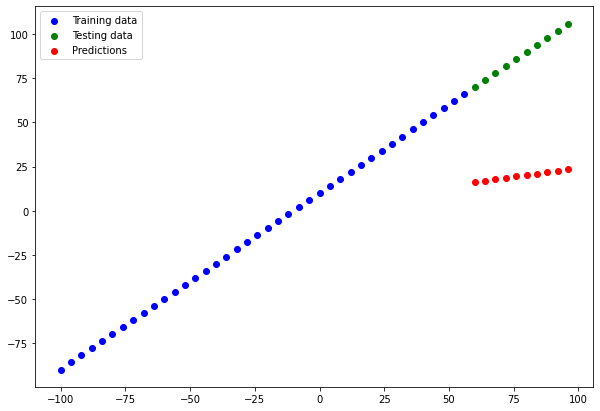

In [ ]:
#MODEL_3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

#make and plot predictions for model_2
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

mae_3 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_3))
mse_3 = tf.keras.losses.MSE(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

In [ ]:
#COMPARING THE RESULTS OF OUR EXPERIMENTS

import pandas as pd
model_results= [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results 

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.149315,4729.350098


As you build more models, you'll want to look into using:

- Tensorboard -- a component of the tensorflow library to help track modelling experiments.

-Weights n Biases -- a tool fo tracking all of kinds of machine learning experiments (plugs straight into tensorboard). 

 

In [ ]:
#A LARGER EXAMPLE

#importing required libraries....
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

#read in the insurance dataset 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance 

In [ ]:
insurance["sex"], insurance["smoker"]

In [ ]:
#one hot encoding our dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

In [ ]:
#create X and y (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

X.head()
y.head()
#create training and test sets

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)      #0.2 means 20% of the whole dataset


#build a neural network (sort of like model_2 above)

tf.random.set_seed(42)

#create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#fit the mdoel
insurance_model.fit(X_train, y_train, epochs=500)

In [ ]:
#check the results of insurance model on the teest data
insurance_model.evaluate(X_test, y_test)


In [ ]:
tf.random.set_seed(42)

#create a model
insurance_model_2 = tf.keras.Sequential([
 #   tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

#fit the mdoel
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)



In [ ]:
insurance_model_2.evaluate(X_test, y_test)
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4253.8984 - mae: 4253.8984


[4253.8984375, 4253.8984375]

In [ ]:
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

#fit the mdoel
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Text(0.5, 0, 'epochs')

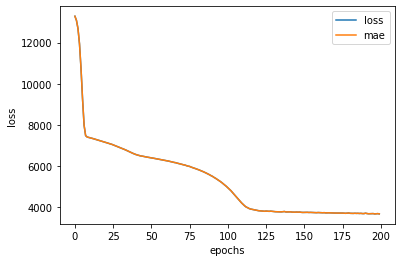

In [ ]:
#plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X["age"].plot()

X["age"].plot(kind="hist")

#Preprocessing data ( normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If your're not sure on which to use, you could try both and see which performs better.


In [ ]:
X

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#create a column transformer
ct  = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in this columns btw 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])

)

#create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit the column transformer to our training data
ct.fit(X_train)

#transform training and test data with normalization(mixmaxscaler) and onehotencoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train.loc[0]
X_train_normal[0]
X_train_normal
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! our data has been normalized and one hot encoded. now lets build a neural network o it and see how it goes...

In [ ]:
#Build a neural network model to fit on our normalized data

tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_4.fit(X_train_normal, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [ ]:
#evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

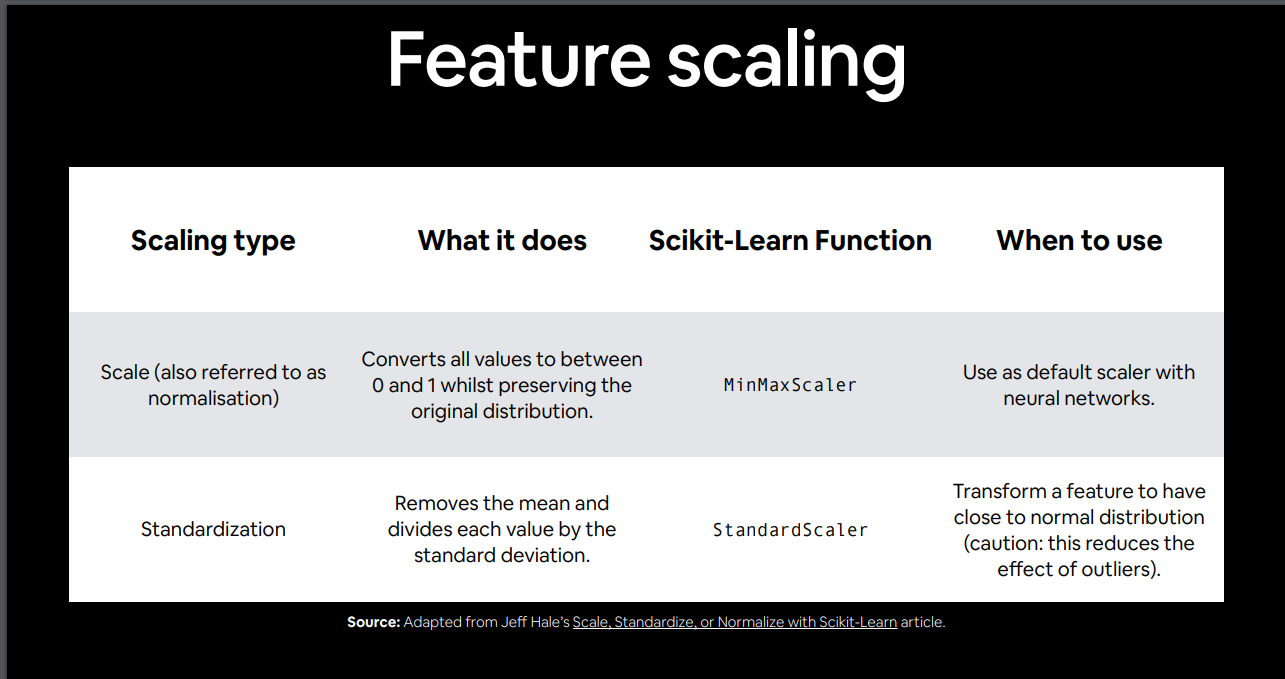